<a href="https://colab.research.google.com/github/chicot1k/karpov_course-analys-data-/blob/main/karpov_course_6lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rolling().mean() - скользящее среднее, берется данные и усредняются с с шагом 1 что уменьшает разброс данных шаг записывается в значение rolling()

get_yticks - метод sns получить значения игрика

.loc[ ]- вытащить по строке из датафрейма

dir() - все методы

.str.replace('-','') - заменить в строке первый аргумент на второй

.cut()- разбитие на интервалы колонку датафрейма




In [46]:
import pandas as pd
import seaborn as sns

In [5]:
df1 = pd.read_csv('/content/avocado_full.csv',index_col=0)
df2 = pd.read_csv('/content/avocado_mean.csv')
df3 = pd.read_csv('/content/delays.csv')
avocado_mean = pd.read_csv("/content/avocado_mean.csv",index_col=0, squeeze=True, parse_dates=['Date'])



<ipython-input-5-5767f54c54b3>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  avocado_mean = pd.read_csv("/content/avocado_mean.csv",index_col=0, squeeze=True, parse_dates=['Date'])


In [ ]:
df2

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [ ]:
avocado_mean.rolling(3).mean().round(2).max()

1.85

In [ ]:
import matplotlib.pyplot as plt

#define grid of plots
plt.figure(figsize=(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

<Axes: xlabel='Date'>

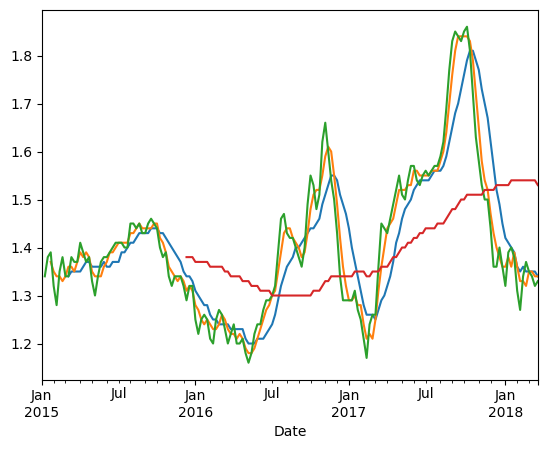

In [ ]:
avocado_mean.rolling(10).mean().round(2).plot()
avocado_mean.rolling(4).mean().round(2).plot()
avocado_mean.rolling(2).mean().round(2).plot()
avocado_mean.rolling(50).mean().round(2).plot()

<ipython-input-60-cf433da13b83>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df2.ewm(2).mean().plot()


<Axes: >

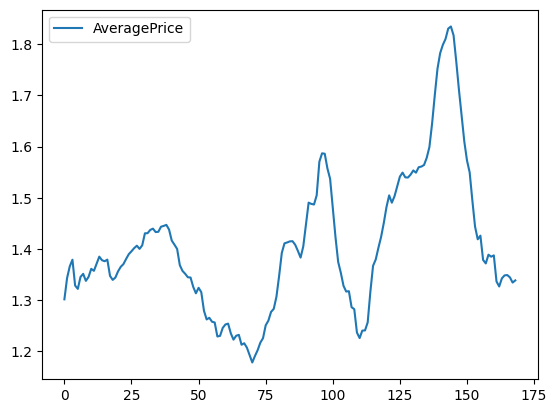

In [ ]:
df2.ewm(2).mean().plot()

In [ ]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


<ipython-input-70-a6c58a6e2f5b>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['region', 'type'], dtype='object')
  .mean()\
<ipython-input-70-a6c58a6e2f5b>:10: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['region', 'type'], dtype='object')
  .mean()\


<Axes: xlabel='Date'>

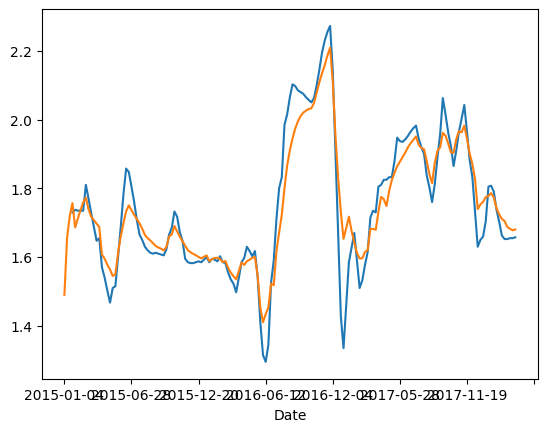

In [ ]:
df1.query('type == "organic"')\
    .query('region == "Chicago"')\
    .rolling(4)\
    .mean()\
    .AveragePrice\
    .plot()
df1.query('type == "organic"')\
    .query('region == "Chicago"')\
    .ewm(4)\
    .mean()\
    .AveragePrice\
    .plot()

<ipython-input-68-b65fd995c322>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['region', 'type'], dtype='object')
  .mean()\


<Axes: xlabel='Date'>

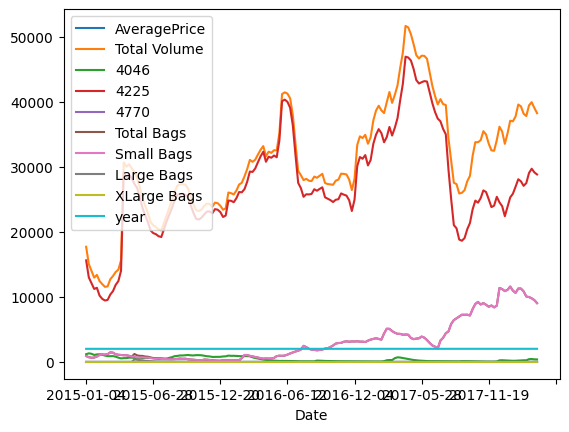

In [ ]:
df1.query('type == "organic"')\
    .query('region == "Chicago"')\
    .ewm(4)\
    .mean()\
    .plot()

In [ ]:
df1.query('type == "organic"')\
    .query('region == "Chicago"')\
    .rolling(4)\
    .mean()\
    .loc['2015-01-25']

<ipython-input-77-ba2f1cefb2bd>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['region', 'type'], dtype='object')
  .mean()\


AveragePrice        1.7300
Total Volume    13522.5725
4046             1120.6350
4225            11718.6050
4770                0.0000
Total Bags        683.3325
Small Bags        683.3325
Large Bags          0.0000
XLarge Bags         0.0000
year             2015.0000
Name: 2015-01-25, dtype: float64

In [21]:
df3.delay = pd.to_timedelta(df3.delay.str.replace('-',''))

In [41]:
bins = [pd.to_timedelta('0d'),pd.to_timedelta('1d'),pd.to_timedelta('2d'),pd.to_timedelta('3d'),pd.to_timedelta('100d')]

In [42]:
df4 = pd.DataFrame(pd.cut(df3.delay, bins, labels =['less than 1 day','1-2 days','2-3 days','more than 3 days']))

<Axes: >

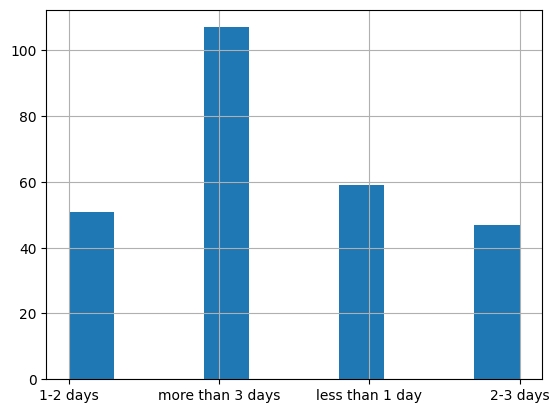

In [60]:
df4.delay.hist()